In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sqlalchemy

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.1 MB 3.3 MB/s eta 0:00:01
   ---------------- ----------------------- 0.9/2.1 MB 6.1 MB/s eta 0:00:01
   ------------------------------- -------- 1.6/2.1 MB 8.1 MB/s eta 0:00:01
   ----------------------------------- ---- 1.9/2.1 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 7.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/290.8 kB ? eta -:--:--
   ---------------------------------------- 290.8/290.8 kB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [84]:
from sqlalchemy import create_engine, inspect
import geopandas as gpd
host=""
database=""
user=""
password=""
connection_string = f"postgresql://{user}:{password}@{host}/{database}"
engine=create_engine(connection_string,
    connect_args={'options': '-csearch_path={}'.format('footpath_audit')})

In [85]:
insp=inspect(engine)
insp.get_table_names()

['audit_network',
 'etl_state',
 'issue_category',
 'issue_line',
 'issue_point',
 'post_audit_questions',
 'profile_data']

In [88]:
sql="select geom as geom from issue_point"
gdf= gpd.read_postgis(sql,con=engine)
gdf_crs=gdf.to_crs(epsg="4326")
gdf_crs

,geom
0,POINT (77.56464 12.93756)
1,POINT (77.56505 12.93761)
2,POINT (77.56516 12.93760)
3,POINT (77.56531 12.93760)
4,POINT (77.56539 12.93759)
...,...
472,POINT (77.56466 12.93764)
473,POINT (77.56472 12.93764)
474,POINT (77.56480 12.93765)
475,POINT (77.56745 12.93780)


<Axes: >

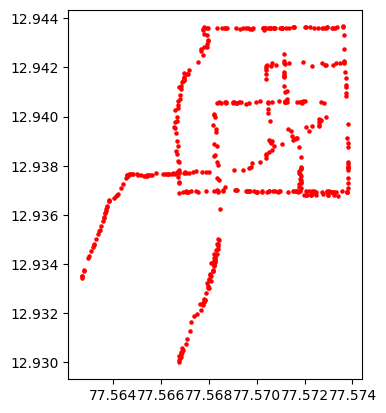

In [89]:
gdf_crs.plot(marker='o', color='red', markersize=5)

<Axes: >

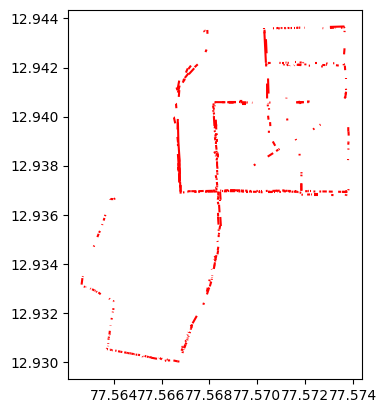

In [96]:
sql="select geom as geom from issue_line"
gdf= gpd.read_postgis(sql,con=engine)
gdf_crs=gdf.to_crs(epsg="4326")
gdf_crs
gdf_crs.plot(marker='o', color='red', markersize=5)

<Axes: >

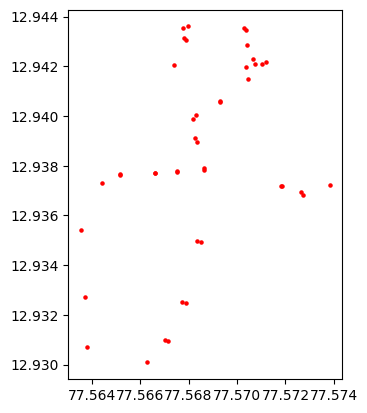

In [97]:
sql="select geom as geom from profile_data"
gdf= gpd.read_postgis(sql,con=engine)
gdf_crs=gdf.to_crs(epsg="4326")
gdf_crs
gdf_crs.plot(marker='o', color='red', markersize=5)

<Axes: >

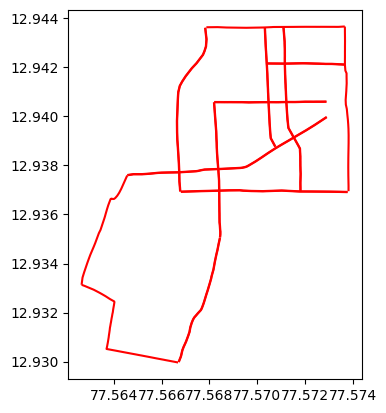

In [98]:
sql="select geom as geom from audit_network"
gdf= gpd.read_postgis(sql,con=engine)
gdf_crs=gdf.to_crs(epsg="4326")
gdf_crs
gdf_crs.plot(marker='o', color='red', markersize=5)